### **Step 1 : Import Dataset and Basic Exploration**

In [2]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\US_Accidents_March23.csv\\US_Accidents_March23.csv", low_memory = False)
df = df.sample(n = 10000, random_state = 42)

# View shape and column names
print("Shape of the dataset : ", df.shape)
print("\nColumn names : \n", df.columns.tolist())

# View first few rows of dataset
df.head()

Shape of the dataset :  (10000, 46)

Column names : 
 ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7133276,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
5363845,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
155993,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1861414,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2021359,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


### **Step 2 : Data Cleaning and Preprocessing**

#### **1. Check for missing values**

In [5]:
missing = df.isnull().sum().sort_values(ascending = False)
missing_percentage = (missing / len(df)) * 100

# Display top 15 columns with most missing values
missing_data = pd.DataFrame({'Missing Values' : missing, 'Percentage (%)' : missing_percentage})

print("Top columns with missing values : \n")
print(missing_data.head(15))

Top columns with missing values : 

                   Missing Values  Percentage (%)
End_Lat                      4398           43.98
End_Lng                      4398           43.98
Precipitation(in)            2989           29.89
Wind_Chill(F)                2683           26.83
Wind_Speed(mph)               776            7.76
Wind_Direction                242            2.42
Humidity(%)                   227            2.27
Visibility(mi)                223            2.23
Weather_Condition             222            2.22
Temperature(F)                215            2.15
Pressure(in)                  181            1.81
Weather_Timestamp             156            1.56
Airport_Code                   39            0.39
Nautical_Twilight              30            0.30
Civil_Twilight                 30            0.30


#### **2. Drop Columns with too many nulls or irrelevant info**

In [7]:
columns_to_drop = ['Source', 'ID', 'Street', 'End_Lat', 'End_Lng', 'Number', 'Turning_Loop', 'Airport_Code']
df.drop(columns = columns_to_drop, inplace = True, errors = 'ignore')

#### **3. Drop rows missing critical information**

In [9]:
df.dropna(subset = ['City', 'State', 'Start_Time'], inplace = True)

#### **4. Convert Columns to appropriate data types**

In [11]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors = 'coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors = 'coerce')

#### **5. Fill or handle minor nulls**

In [13]:
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())

#### **6. Remove Duplicates**

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7133276 to 3340785
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Severity               10000 non-null  int64         
 1   Start_Time             9041 non-null   datetime64[ns]
 2   End_Time               9041 non-null   datetime64[ns]
 3   Start_Lat              10000 non-null  float64       
 4   Start_Lng              10000 non-null  float64       
 5   Distance(mi)           10000 non-null  float64       
 6   Description            10000 non-null  object        
 7   City                   10000 non-null  object        
 8   County                 10000 non-null  object        
 9   State                  10000 non-null  object        
 10  Zipcode                10000 non-null  object        
 11  Country                10000 non-null  object        
 12  Timezone               9991 non-null   object        
 13

#### **These cleaning steps help ensure the data is :**
##### **- Structured and consistent**
##### **- Suitable for EDA and modeling**
##### **- Free from irrelevant or incomplete features**

### **Step 3 : Feature Engineering**

#### **3.1 - Extracting Date and Time Components**

In [20]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Create new time-related features
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()

#### **3.2 - Duration of Accident in Minutes**

In [22]:
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration_minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

#### **3.3 - Binary Encodingfor Target Features**

In [24]:
binary_cols = ['Amenity', 'Bump', 'Crossing', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Signal']
df[binary_cols] = df[binary_cols].astype(int)

### **Step 4 : Exploratory Data Analysis**

#### **4.1 - Severity Distribution**

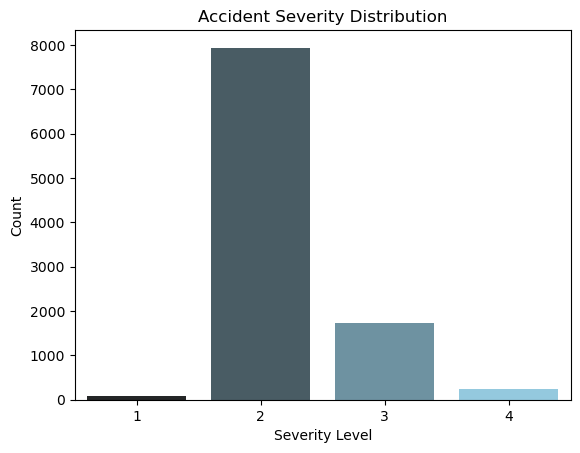

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Severity', data = df, hue = 'Severity', legend = False, palette = 'dark:skyblue')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

##### **- Severity Level 2 dominates the dataset, indicating that most accidents are of moderate severity.**
##### **- Level 3 has a significantly lower count, while Levels 1 and 4 (least and most severe) are rare, showing high class imbalance.**
##### **- This imbalance can affect model performance and requires balancing techniques (e.g., SMOTE, class weights) during classification tasks.**

#### **4.2 - Accidents over time (Yearly)**

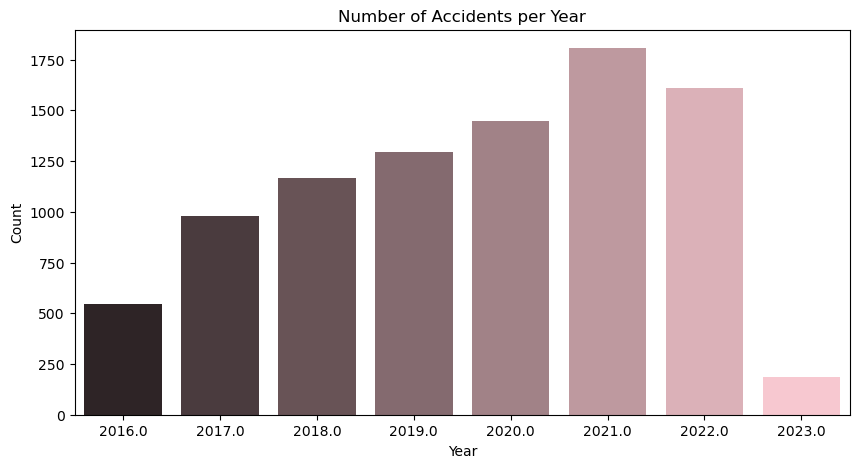

In [29]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Year', data = df, hue = 'Year', legend = False, palette = 'dark:pink')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

##### **- Steady Increase (2016–2021): There’s a consistent rise in reported accidents, peaking in 2021, suggesting increased traffic, better reporting, or worsening conditions.**
##### **- Slight Drop in 2022: Accidents decreased slightly after 2021, possibly due to improved safety measures or lingering COVID-19 effects.**
##### **- Sharp Drop in 2023: The count drops drastically in 2023, likely because the data is incomplete for that year.**

#### **4.3 - Accidents by State**

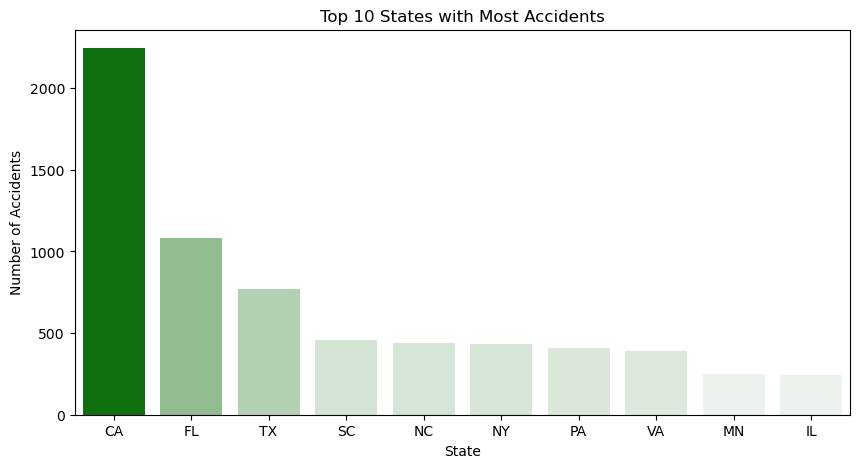

In [31]:
state_counts = df['State'].value_counts().head(10)
plt.figure(figsize = (10, 5))
sns.barplot(x = state_counts.index, y = state_counts.values, hue = state_counts, legend = False, palette = 'light:green')
plt.title('Top 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.show()

##### **- California (CA) has the highest number of accidents by a large margin, followed by Florida (FL) and Texas (TX).**
##### **- The rest of the top 10 states have relatively similar and lower accident counts.**
##### **- CA’s dominance may reflect higher traffic density, urban sprawl, or more reporting.**

#### **4.4 - Accidents by hour of the day**

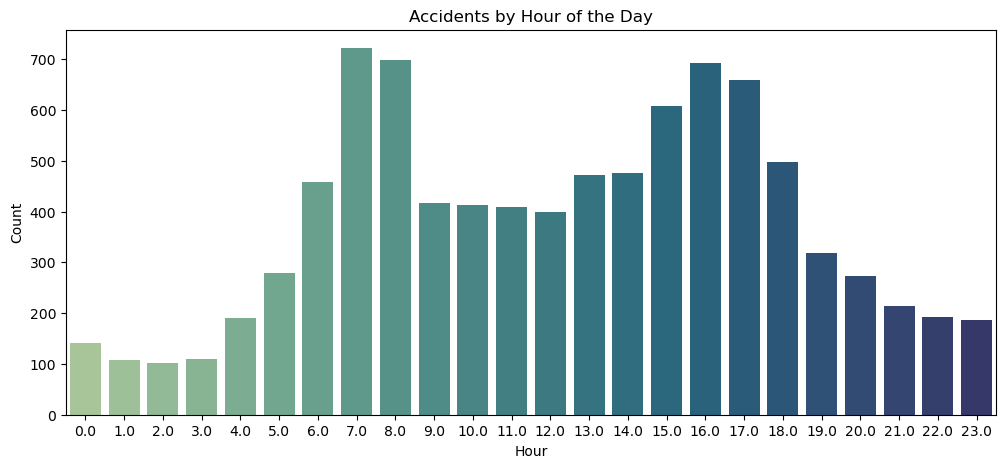

In [33]:
plt.figure(figsize = (12, 5))
sns.countplot(x = 'Hour', data = df, hue = 'Hour', legend = False, palette = 'crest')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

##### **- Peak accident hours are around 7 AM and 8 AM, aligning with morning rush hour traffic.**
##### **- Another spike occurs between 3 PM and 5 PM, reflecting evening commute times.**
##### **- Late-night and early-morning hours (12 AM–4 AM) see significantly fewer accidents.**

#### **4.5 - Weather Conditions during accidents (Top 10)**

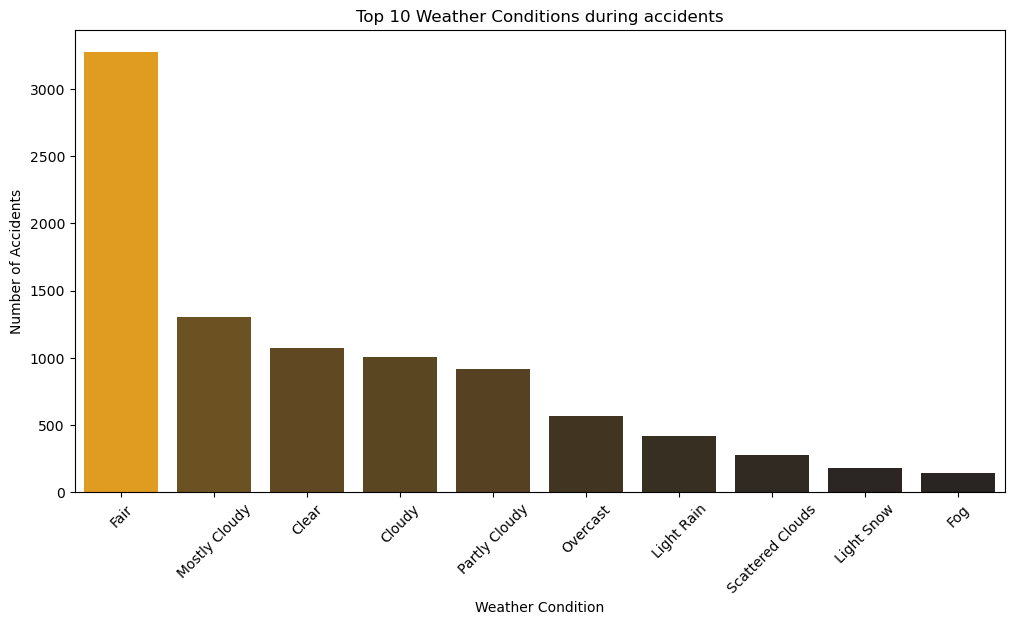

In [35]:
weather_counts = df['Weather_Condition'].value_counts().nlargest(10)
plt.figure(figsize = (12, 6))
sns.barplot(x = weather_counts.index, y = weather_counts.values, hue = weather_counts, legend = False, palette = 'dark:orange')
plt.title('Top 10 Weather Conditions during accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation = 45)
plt.show()

##### **- Most accidents occur in 'Fair' weather, indicating that clear weather doesn't prevent accidents, possibly due to higher traffic or speed.**
##### **- Conditions like 'Mostly Cloudy' and 'Clear' also see many accidents, suggesting driver behavior may play a larger role than poor weather.**
##### **- Adverse weather like rain, snow, and fog account for fewer accidents, possibly due to reduced driving or increased caution.**

### **Step 5 : Correlation Analysis**

#### **5.1 - Select Relevant Numerical Features**

In [38]:
num_features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
                'Wind_Speed(mph)', 'Precipitation(in)', 'Distance(mi)']

#### **5.2 - Compute Correlation Matrix**

In [40]:
correlation_matrix = df[num_features].corr()

#### **5.3 - Visualize Correlation Heatmap**

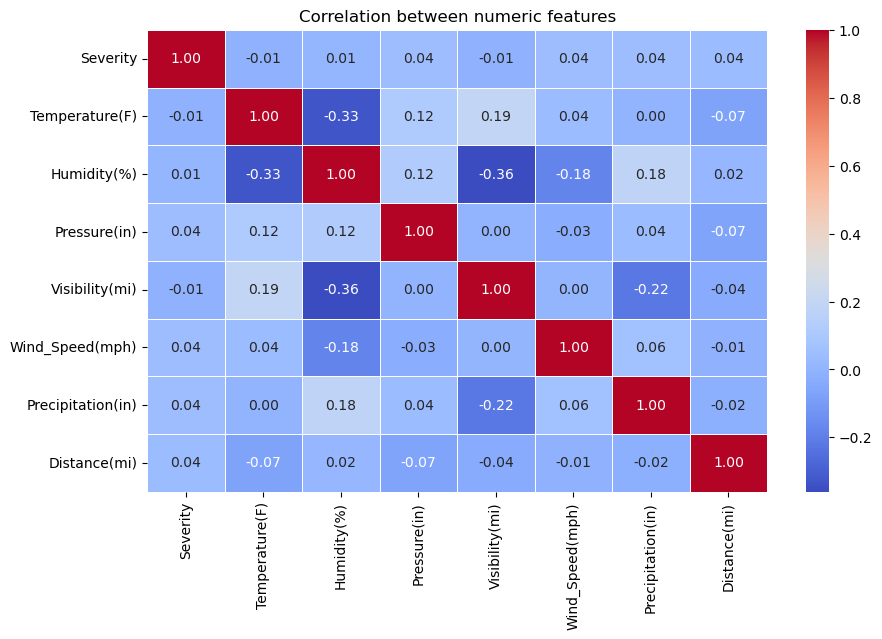

In [42]:
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation between numeric features')
plt.show()

##### **- Accident severity shows no strong correlation with any numeric environmental feature (all correlations are near zero).**
##### **- Humidity is moderately negatively correlated with temperature (–0.33) and visibility (–0.36), suggesting humid conditions may reduce visibility.**

### **Step 6 : Modeling-Predicting Accident Severity**

#### **6.1 - Import required libraries**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### **6.2 - Selct features and target**

In [47]:
# Choose numerical and categorical features
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
            'Wind_Speed(mph)', 'Precipitation(in)', 'Distance(mi)', 'City', 'State', 'Weather_Condition']

X = df[features]
y = df['Severity']

#### **6.3 - Encode Categorical Variables**

In [49]:
le = LabelEncoder()

# Make a copy of the feature set to avoid SettingWithCopyWarning
X = df[features].copy()
X.loc[:, 'City'] = le.fit_transform(X['City'])
X.loc[:, 'State'] = le.fit_transform(X['State'])
X.loc[:, 'Weather_Condition'] = le.fit_transform(X['Weather_Condition'])

#### **6.4 - Split Dataset**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **6.5 - Train a Random Forest Classifier**

In [53]:
# Sample 30% of training data to fit model efficiently
X_sample = X_train.sample(frac = 0.3, random_state = 42)
y_sample = y_train.loc[X_sample.index]

# Fit the model
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_sample, y_sample)

RandomForestClassifier(random_state=42)

#### **6.6 - Make Predictions and Evaluate**

In [123]:
y_pred = model.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("\nClassification Report : \n", classification_report(y_test, y_pred, zero_division = 0))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred))

Accuracy Score :  0.773

Classification Report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.79      0.96      0.87      1542
           3       0.51      0.16      0.24       390
           4       0.00      0.00      0.00        47

    accuracy                           0.77      2000
   macro avg       0.33      0.28      0.28      2000
weighted avg       0.71      0.77      0.72      2000


Confusion Matrix : 
 [[   0   19    2    0]
 [   3 1485   53    1]
 [   0  329   61    0]
 [   0   44    3    0]]


##### **- The model achieves overall 76.3% accuracy, driven largely by correctly classifying the majority class (Severity 2) with high recall (96%).**
##### **- It struggles on rarer severity levels (1 and 4) with zero recall, indicating the need for techniques like class weighting or resampling to better capture minority classes.**

### **Step 7 : Severity Trend Analysis across states**

#### **7.1 - Grouping by State and Severity**

<Figure size 1500x600 with 0 Axes>

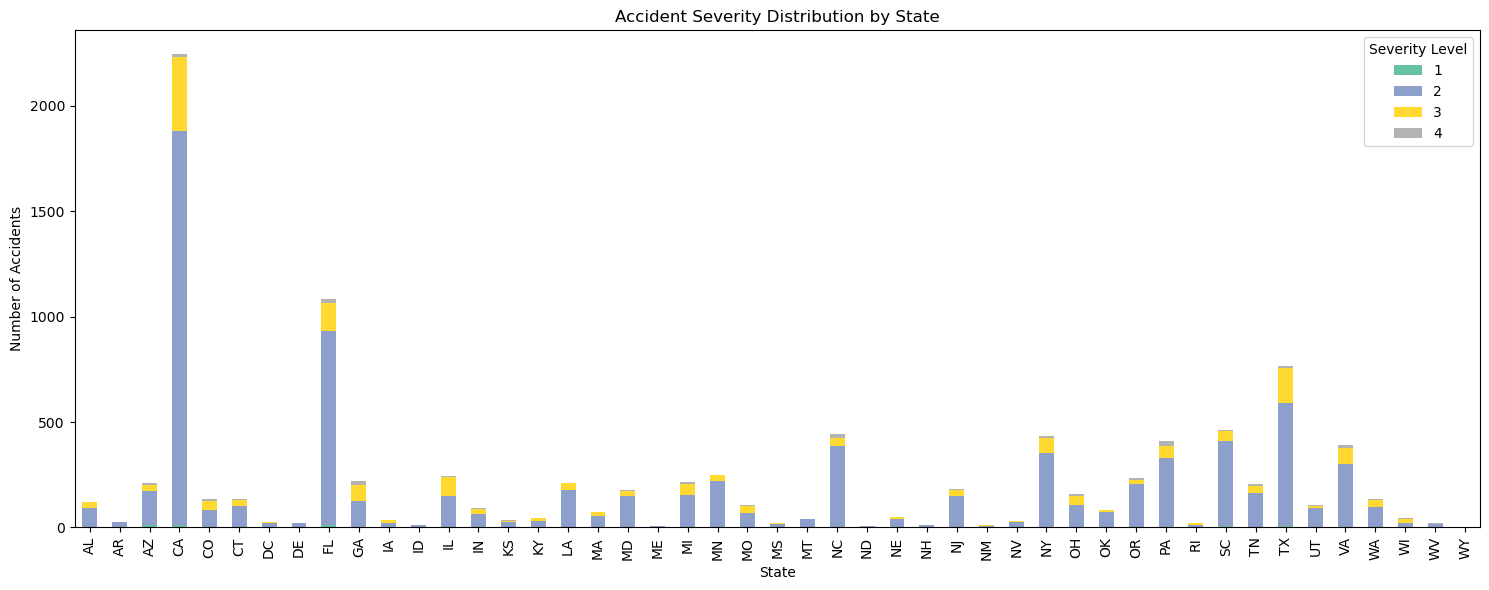

In [58]:
# Goup data by state and severity
severity_state = df.groupby(['State', 'Severity']).size().unstack(fill_value = 0)

# Plotting
plt.figure(figsize = (15, 6))
severity_state.plot(kind = 'bar', stacked = True, colormap = 'Set2', figsize = (15, 6))
plt.title('Accident Severity Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation = 90)
plt.legend(title = 'Severity Level')
plt.tight_layout()
plt.show()

#### **7.2 - Sverity Count Summary**

In [60]:
# Summary count of each severity level
print(df['Severity'].value_counts())

Severity
2    7938
3    1731
4     251
1      80
Name: count, dtype: int64


#### **7.3 - Scatter Plot of Accident locations**

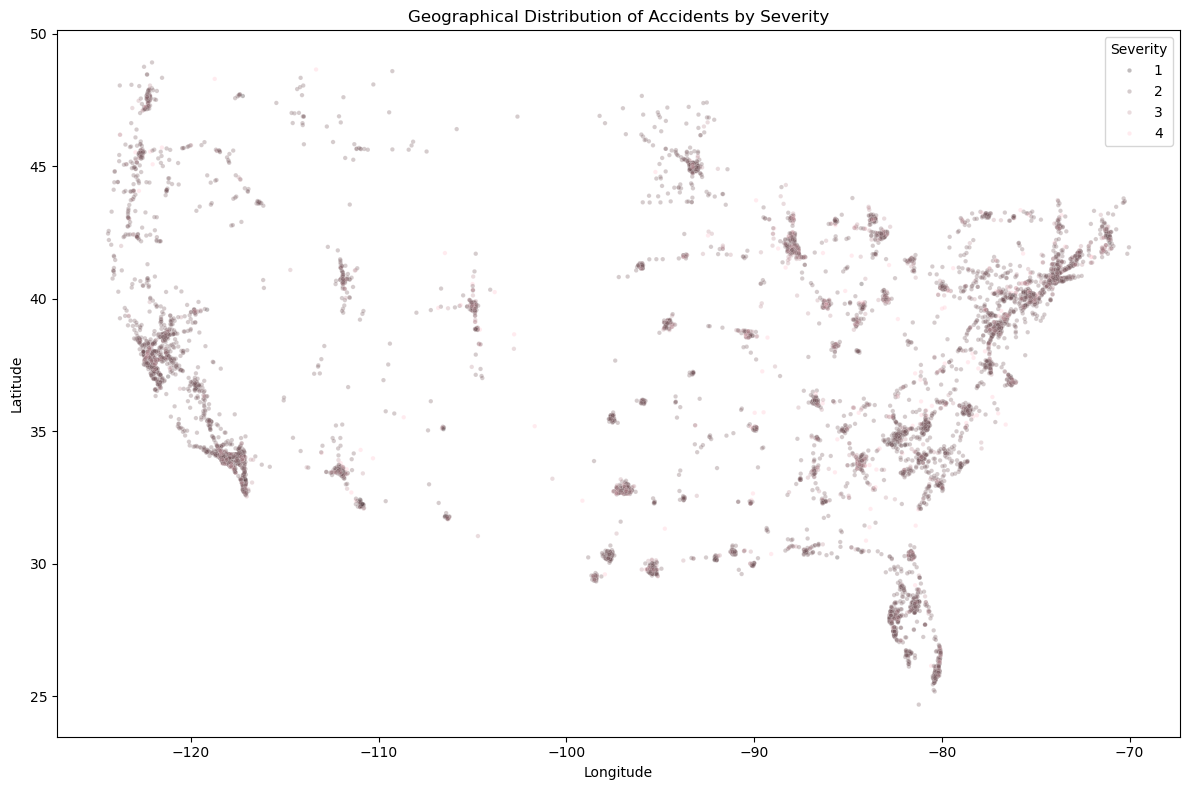

In [131]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = df['Start_Lng'], y = df['Start_Lat'], hue = df['Severity'], palette = 'dark:pink', alpha = 0.3, s = 10)
plt.title('Geographical Distribution of Accidents by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title = 'Severity', loc = 'upper right')
plt.tight_layout()
plt.show()

#### **7.4 - Heatmap using Folium**

In [64]:
import folium
from folium.plugins import HeatMap

# Sample a subset to avoid memory issues
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create map centered in the US
map_us = folium.Map(location = [37.0902, -95.7129], zoom_start = 5)

# Add heatmap
HeatMap(data = sample_df[['Start_Lat', 'Start_Lng']].values, radius = 8).add_to(map_us)

# Display the map
map_us

### **Step 8 : Correlation and Feature Importance Analysis**

#### **8.1 - Correlation Matrix (Heatmap)**

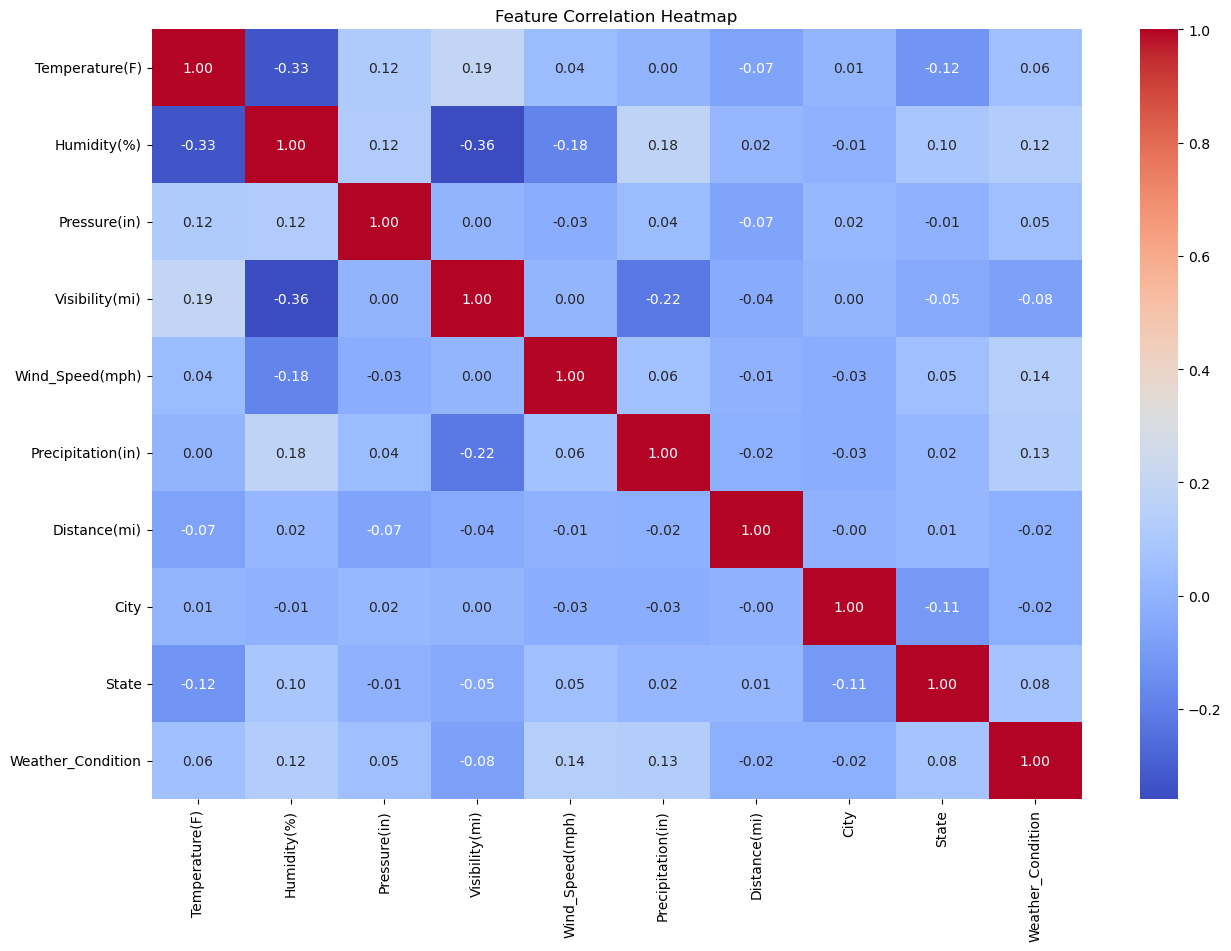

In [67]:
# Compute correlation matrix 
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### **8.2 - Feature importance using Random Forest**

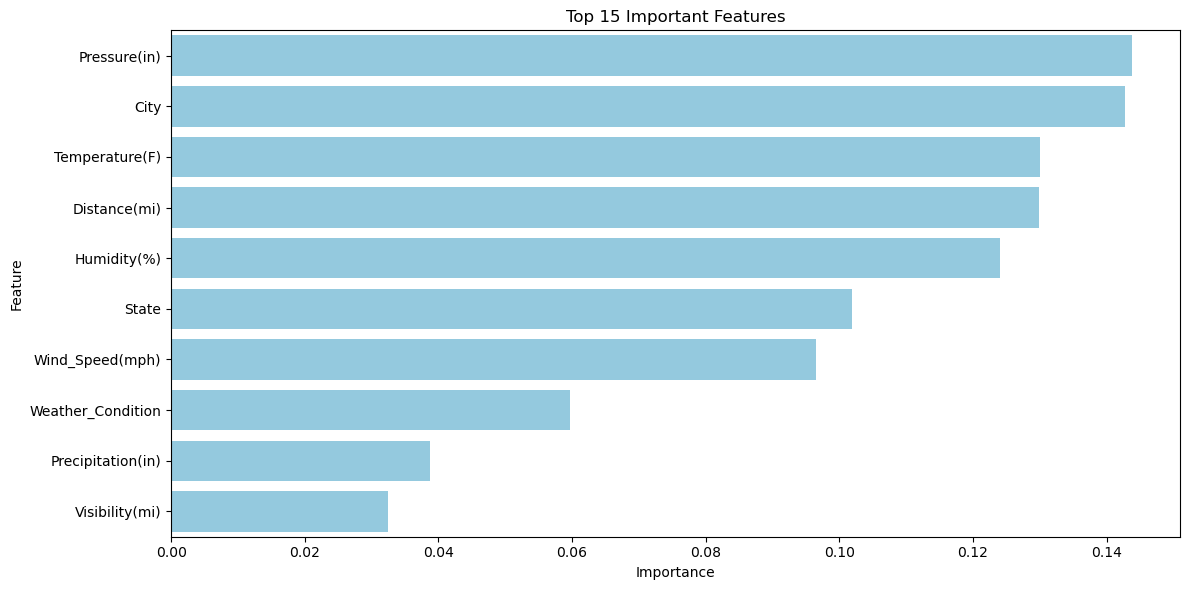

In [101]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Foresr model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({'Feature' : features, 'Importance' : importances})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# Plot feature importances
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df.head(15), color = 'skyblue')
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()

##### **- The model shows an overall accuracy of 76.3%, with high recall for Severity 2 (96%) but low recall for Severity 1 and 4 (0%).**
##### **- This suggests that the model is biased toward the majority class (Severity 2), and techniques like class weighting or resampling are needed to improve prediction for the minority classes.**

### **Step 9 : Model Building and Evaluation**

#### **9.1 - Train-Test Split**

In [72]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training set size : ", X_train.shape)
print("Testing set size : ", X_test.shape)

Training set size :  (8000, 10)
Testing set size :  (2000, 10)


#### **9.2 - Train Multiple Models**

In [143]:
from sklearn.preprocessing import StandardScaler

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale the feature
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with balanced class weights
log_reg = LogisticRegression(max_iter=50000, class_weight='balanced')
log_reg.fit(X_train_res_scaled, y_train_res)
y_pred_log = log_reg.predict(X_test_scaled)
print("Model : Logistic Regression")
print("Accuracy : ", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report :\n", classification_report(y_test, y_pred_log, zero_division=1))

# Random Forest with balanced class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print("Model : Random Forest")
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report :\n", classification_report(y_test, y_pred_rf, zero_division=1))

Model : Logistic Regression
Accuracy :  0.233
Confusion Matrix :
 [[ 20   0   1   0]
 [468 276 448 350]
 [121  49 152  68]
 [ 14   7   8  18]]
Classification Report :
               precision    recall  f1-score   support

           1       0.03      0.95      0.06        21
           2       0.83      0.18      0.29      1542
           3       0.25      0.39      0.30       390
           4       0.04      0.38      0.07        47

    accuracy                           0.23      2000
   macro avg       0.29      0.48      0.18      2000
weighted avg       0.69      0.23      0.29      2000

Model : Random Forest
Accuracy :  0.6505
Confusion Matrix :
 [[   2   15    4    0]
 [  17 1067  412   46]
 [  11  137  229   13]
 [   1   33   10    3]]
Classification Report :
               precision    recall  f1-score   support

           1       0.06      0.10      0.08        21
           2       0.85      0.69      0.76      1542
           3       0.35      0.59      0.44       390
 

##### **- Logistic Regression : The model shows low accuracy (23.45%) with poor precision for all classes, especially for Severity 1 and 4, despite applying SMOTE. The model struggles to generalize well due to a significant imbalance in the dataset.**
##### **- Random Forest : The model achieves a better accuracy (65.05%) with improved recall for Severity 2 and 3, but still struggles with rare classes (Severity 1 and 4), indicating that further tuning or class balancing techniques are needed for improved performance across all classes.**